In [ ]:
import dask.dataframe as dd
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import gc as gc

# **Mounting Drive and Reading CSV**

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file_path_training = "/content/gdrive/MyDrive/Project_NAPS/NAPS/data/processed-data.csv"
# Read Parquet data into a Dask DataFrame
df = pd.read_csv(file_path_training)#, nparitions=10)

print(df.head())

   Unnamed: 0     series_id  step            timestamp   anglez    enmo  \
0           0  08db4255286f     0  2018-11-05 14:00:00  30.8453  0.0447   
1           1  08db4255286f     1  2018-11-05 14:00:05  34.1818  0.0443   
2           2  08db4255286f     2  2018-11-05 14:00:10  33.8771  0.0483   
3           3  08db4255286f     3  2018-11-05 14:00:15  34.2821  0.0680   
4           4  08db4255286f     4  2018-11-05 14:00:20  34.3858  0.0768   

   awake  hour  anglez_diff  enmo_diff  anglez_rolling_mean  \
0      1    14        -5.98     0.0184                30.77   
1      1    14        -5.98     0.0184                30.77   
2      1    14        -5.98     0.0184                30.77   
3      1    14        -5.98     0.0184                30.77   
4      1    14        -5.98     0.0184                30.77   

   enmo_rolling_mean  anglez_rolling_max  enmo_rolling_max  \
0            0.05838               34.94            0.1073   
1            0.05838               34.94      

# **Creating DataFrames for Training**

In [ ]:
features = ["hour",
            "anglez",
            "anglez_rolling_mean",
            "anglez_rolling_max",
            "anglez_rolling_std",
            "anglez_diff",
            "anglez_diff_rolling_mean",
            "anglez_diff_rolling_max",
            "enmo",
            "enmo_rolling_mean",
            "enmo_rolling_max",
            "enmo_rolling_std",
            "enmo_diff",
            "enmo_diff_rolling_mean",
            "enmo_diff_rolling_max",
           ]

X_df = df[features]
Y_df = df["awake"]

# remove df from memory since no longer needed
del df
gc.collect();

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_df.values, Y_df.values, test_size=0.2, random_state=42)

del X_df, Y_df
gc.collect();

# **Training**
**Note: you need to pick which classifier you want before running.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50,
                                    min_samples_leaf=300,
                                    random_state=42,n_jobs=-1)

classifier.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=300, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
# #If you want ExtraTreesClassifier, uncomment this cell, and comment the one above it.

# from sklearn.ensemble import ExtraTreesClassifier

# # Initialize the Extra Trees Classifier
# classifier = ExtraTreesClassifier()

# # Train the model
# classifier.fit(X_train, Y_train)

# **Making and Assesssing Predictions on Test Data**

In [ ]:
from sklearn.metrics import mean_squared_error
#Prediction
Y_pred = classifier.predict(X_test)

#Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.042068472590607614


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision
precision = precision_score(Y_test, Y_pred, average='macro')

# Calculate recall
recall = recall_score(Y_test, Y_pred, average='macro')

# Calculate F1 score
f1 = f1_score(Y_test, Y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9513126270609074
Recall: 0.9558347765351782
F1 Score: 0.9535061215797254
Accuracy: 0.9579315274093924


In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, confusion_matrix, classification_report


# Calculate log loss
logloss = log_loss(Y_test, Y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(Y_test, Y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)

print(f"Log Loss: {logloss}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Classification Report:\n {class_report}")

Log Loss: 1.5163014446654366
AUC-ROC: 0.9558347765351782
Confusion Matrix:
 [[ 854991   45762]
 [  65009 1667350]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94    900753
           1       0.97      0.96      0.97   1732359

    accuracy                           0.96   2633112
   macro avg       0.95      0.96      0.95   2633112
weighted avg       0.96      0.96      0.96   2633112



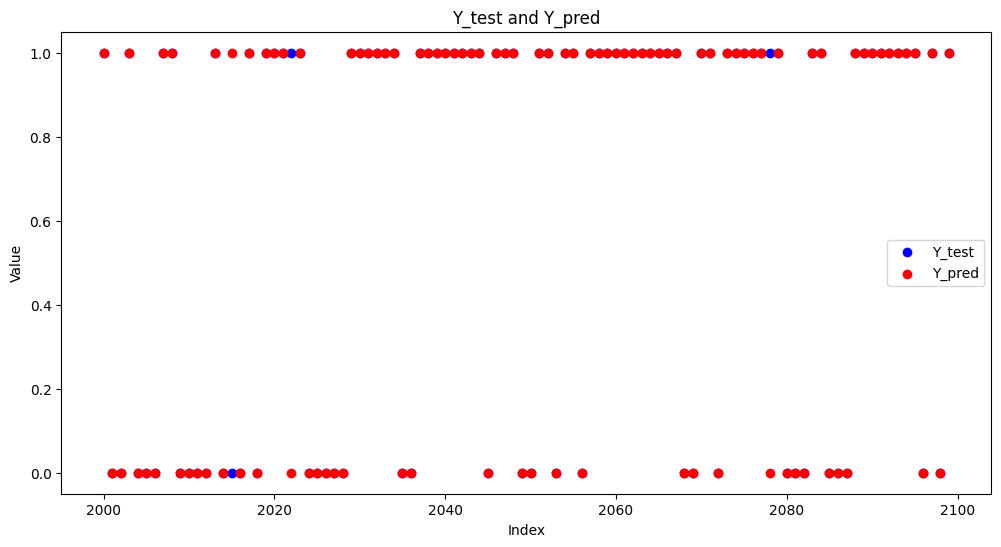

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure with a specified size (width, height)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Y_test and Y_pred
ax.scatter(range(2000, 2100), Y_test[2000:2100], color='blue', label='Y_test')
ax.scatter(range(2000, 2100), Y_pred[2000:2100], color='red', label='Y_pred')

# Set the title, x-axis label, and y-axis label
ax.set_title('Y_test and Y_pred')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()

